In [9]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

path = '/mnt/d/Documents/summary_avg_model.csv'
df = pd.read_csv(path, index_col=0)
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])
df['Site_Exp'] = df['Study_Site'] + '_Exp' + df['Experiment'].astype(str)
df = df.sort_values(by='Date').reset_index(drop=True)
df.head()

,Study_Site,Experiment,Year,Month,Day,Avg_Rattlesnakes,Avg_Krats,Avg_Rattlesnakes_Density,Avg_Krats_Density,Avg_Rattlesnakes_Active,Avg_Krats_Active,Num_Sims,Date,Site_Exp
0,Canada,1,2000,6,1,300.558333,2999.175000,0.751667,7.498667,125.283333,624.850000,5,2000-06-01,Canada_Exp1
1,Canada,2,2000,6,1,300.433333,3000.166667,0.751083,7.500917,126.125000,628.041667,5,2000-06-01,Canada_Exp2
2,Nebraska,2,2000,6,1,300.116667,3004.633333,0.750250,7.511417,121.008333,626.016667,5,2000-06-01,Nebraska_Exp2
3,Texas,0,2000,6,1,300.733333,3009.475000,0.751833,7.523667,122.975000,623.725000,5,2000-06-01,Texas_Exp0
4,Nebraska,1,2000,6,1,299.933333,3006.791667,0.750000,7.516833,120.200000,628.191667,5,2000-06-01,Nebraska_Exp1


In [7]:
df[['Study_Site', 'Experiment', 'Num_Sims']].drop_duplicates()

,Study_Site,Experiment,Num_Sims
0,Canada,2,5
146,Canada,2,4
160,Canada,3,5
292,Canada,0,5
443,Nebraska,1,5
573,Nebraska,1,4
583,Nebraska,1,3
588,Nebraska,3,2
597,Nebraska,3,5
756,Nebraska,3,4


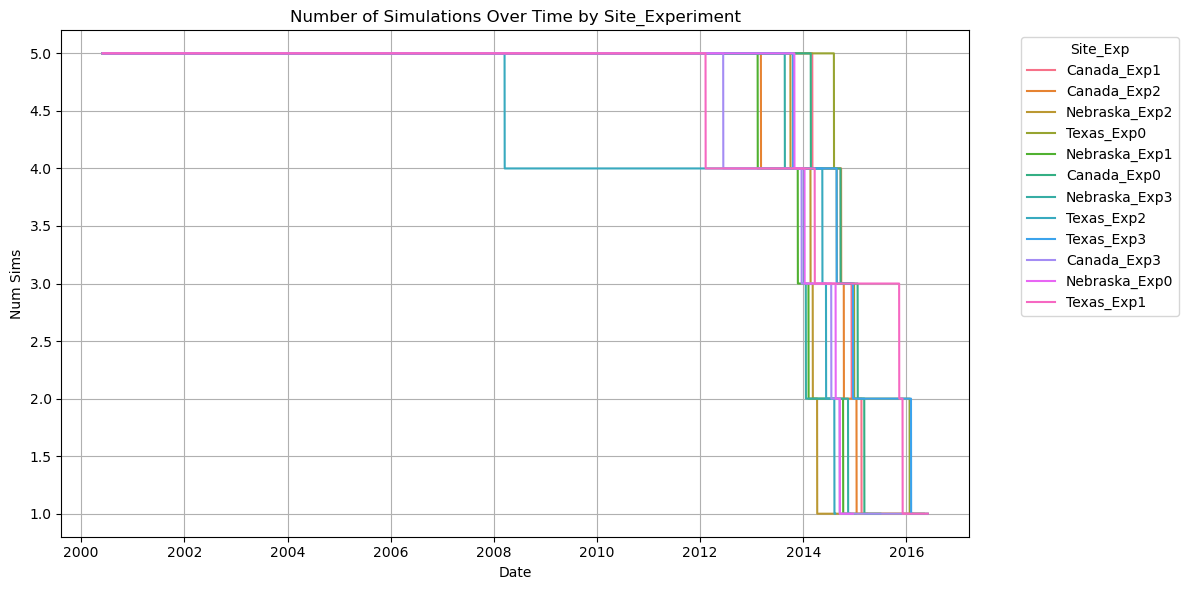

In [11]:
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='Num_Sims', hue='Site_Exp')

plt.title('Number of Simulations Over Time by Site_Experiment')
plt.xlabel('Date')
plt.ylabel('Num Sims')
plt.grid(True)
plt.legend(title='Site_Exp', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

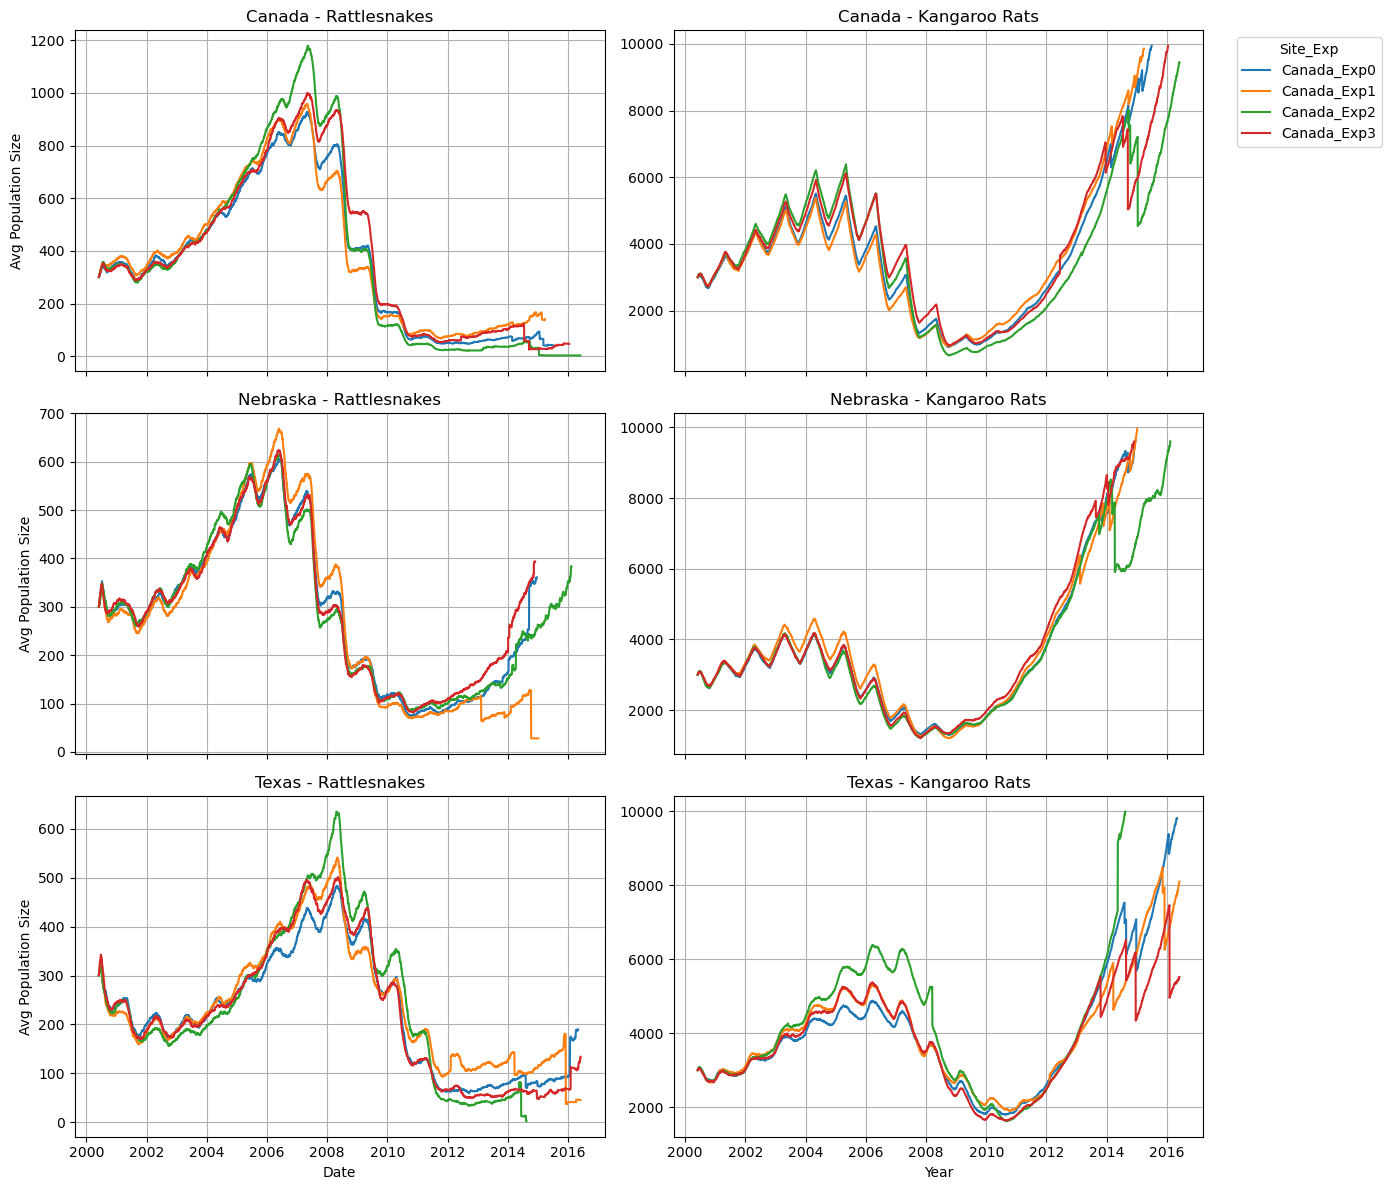

In [14]:
# Combine into datetime
import matplotlib.pyplot as plt

# Ensure Date and Site_Exp columns are correct
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])
df['Site_Exp'] = df['Study_Site'] + '_Exp' + df['Experiment'].astype(str)
df = df.sort_values(by='Date')

# Unique study sites
sites = df['Study_Site'].unique()

# Create 2x3 grid of subplots (3 rows, 2 columns)
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 12), sharex=True)

# Loop over sites and plot in left (rattlesnakes) and right (krats) columns
for i, site in enumerate(sites):
    site_df = df[df['Study_Site'] == site]

    # Left column: Avg_Rattlesnakes
    ax_left = axes[i, 0]
    for key, group in site_df.groupby('Site_Exp'):
        ax_left.plot(group['Date'], group['Avg_Rattlesnakes'], label=key)
    ax_left.set_title(f"{site} - Rattlesnakes")
    ax_left.set_ylabel('Avg Population Size')
    ax_left.grid(True)
    if i == len(sites) - 1:
        ax_left.set_xlabel('Date')

    # Right column: Avg_Krats
    ax_right = axes[i, 1]
    for key, group in site_df.groupby('Site_Exp'):
        ax_right.plot(group['Date'], group['Avg_Krats'], label=key)
    ax_right.set_title(f"{site} - Kangaroo Rats")
    ax_right.grid(True)
    if i == len(sites) - 1:
        ax_right.set_xlabel('Year')

# Add legend to the top-left plot only (or customize per need)
axes[0, 1].legend(title='Site_Exp', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()



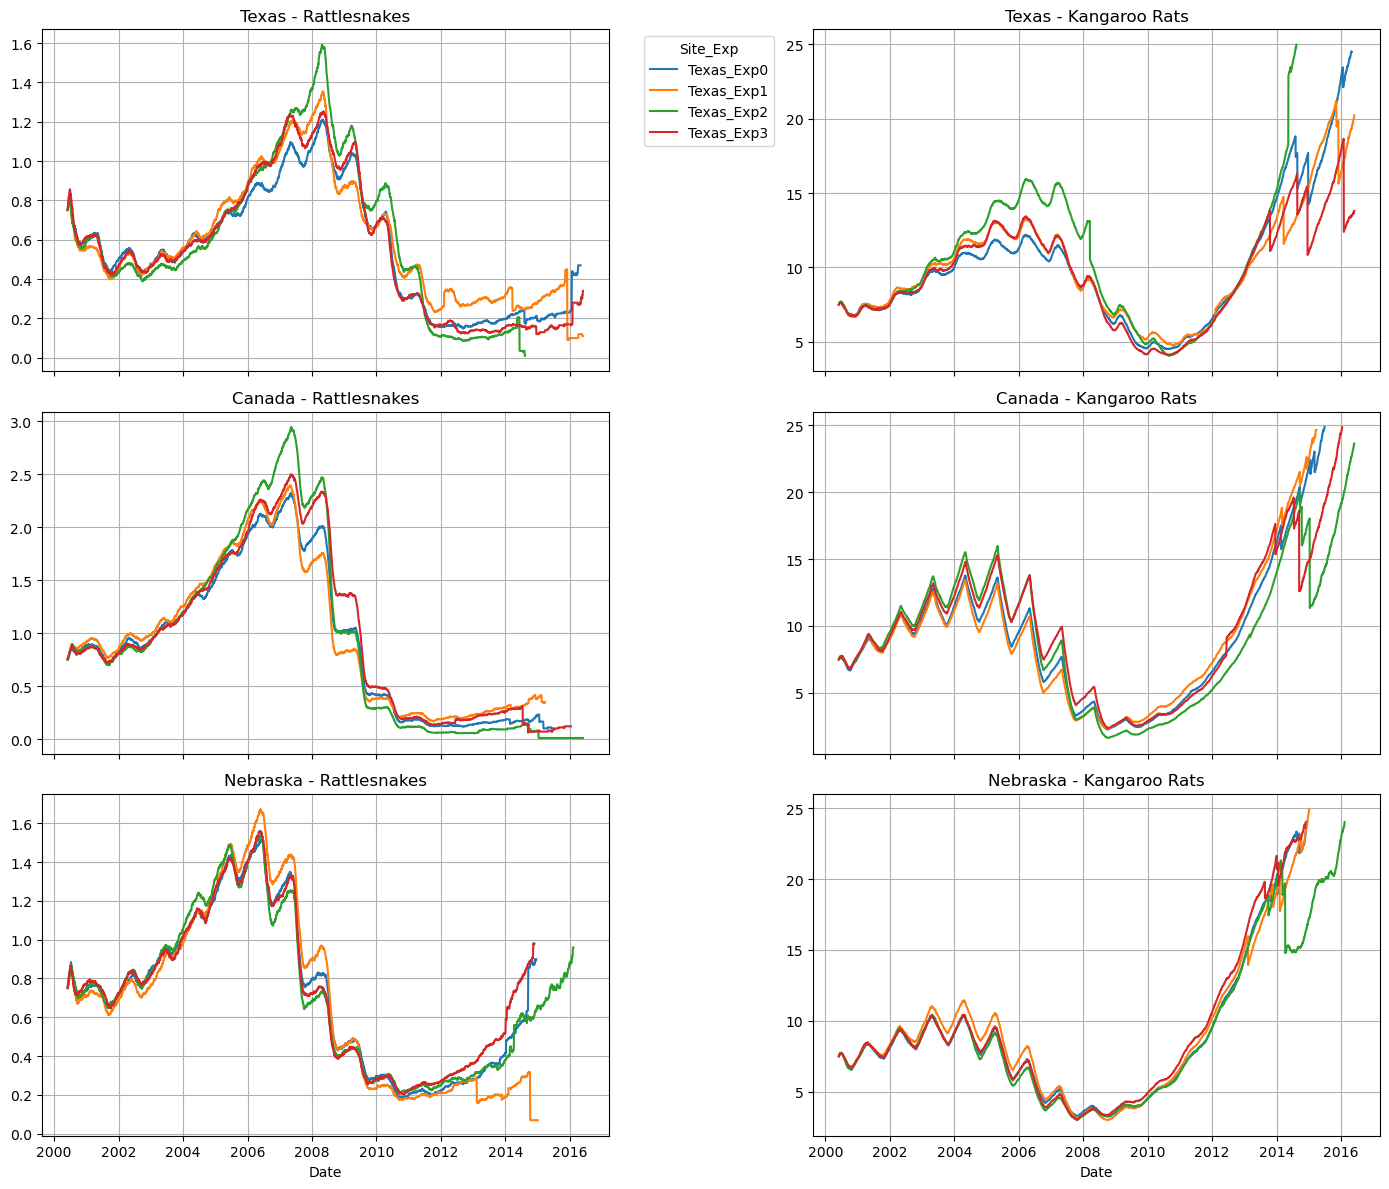

In [4]:

# Unique study sites
sites = df['Study_Site'].unique()

# Create 2x3 grid of subplots (3 rows, 2 columns)
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 12), sharex=True)

# Loop over sites and plot in left (rattlesnakes) and right (krats) columns
for i, site in enumerate(sites):
    site_df = df[df['Study_Site'] == site]

    # Left column: Avg_Rattlesnakes
    ax_left = axes[i, 0]
    for key, group in site_df.groupby('Site_Exp'):
        ax_left.plot(group['Date'], group['Avg_Rattlesnakes_Density'], label=key)
    ax_left.set_title(f"{site} - Rattlesnakes")
    ax_left.grid(True)
    if i == len(sites) - 1:
        ax_left.set_xlabel('Date')

    # Right column: Avg_Krats
    ax_right = axes[i, 1]
    for key, group in site_df.groupby('Site_Exp'):
        ax_right.plot(group['Date'], group['Avg_Krats_Density'], label=key)
    ax_right.set_title(f"{site} - Kangaroo Rats")
    ax_right.grid(True)
    if i == len(sites) - 1:
        ax_right.set_xlabel('Date')

# Add legend to the top-left plot only (or customize per need)
axes[0, 0].legend(title='Site_Exp', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

